In [1]:
from utils.mt5 import login_
login_()

Connected to MetaTrader5 successfully!


In [2]:
from utils.mt5 import get_currency_pair_data_
df = get_currency_pair_data_(currency_pair="USDCHF")
df.tail()

,close
time,
2024-11-18,0.88321
2024-11-19,0.88205
2024-11-20,0.88363
2024-11-21,0.88681
2024-11-22,0.88568


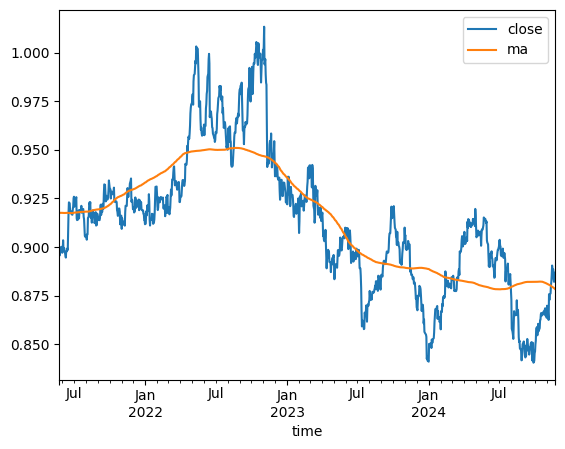

In [3]:
import matplotlib.pyplot as plt

ma = df.rolling(window=365, min_periods=183,center=True).mean()
ax = df.plot()
ma.plot(ax=ax)

plt.legend(['close', 'ma']);

# Trend

In [4]:
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression

dp = DeterministicProcess(index=df.index, constant=True, order=2, drop=True)
X = dp.in_sample()
y = df['close']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

df['trend'] = model.predict(X)
df

,close,trend
time,,
2021-05-24,0.89698,0.919866
2021-05-25,0.89560,0.919965
2021-05-26,0.89772,0.920064
2021-05-27,0.89702,0.920163
2021-05-28,0.89985,0.920261
...,...,...
2024-11-18,0.88321,0.845891
2024-11-19,0.88205,0.845656
2024-11-20,0.88363,0.845420


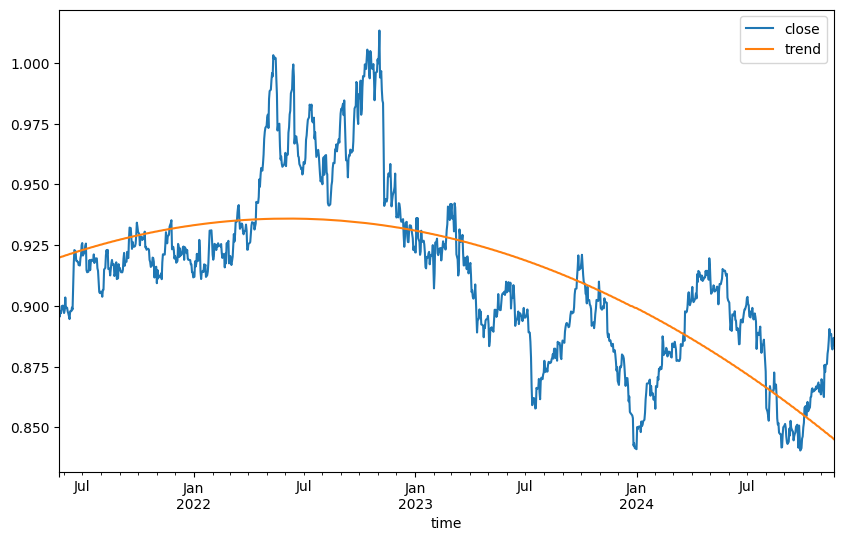

In [5]:
plt.figure(figsize=(10, 6))
ax = df['close'].plot()
df['trend'].plot(ax=ax)
plt.legend(['close', 'trend']);

# Seasonality

In [6]:
df = df.copy()

df['dayofweek'] = df.index.dayofweek
df['week'] = df.index.week

df['dayofyear'] = df.index.dayofyear
df['year'] = df.index.year

df


,close,trend,dayofweek,week,dayofyear,year
time,,,,,,
2021-05-24,0.89698,0.919866,0,21,144,2021
2021-05-25,0.89560,0.919965,1,21,145,2021
2021-05-26,0.89772,0.920064,2,21,146,2021
2021-05-27,0.89702,0.920163,3,21,147,2021
2021-05-28,0.89985,0.920261,4,21,148,2021
...,...,...,...,...,...,...
2024-11-18,0.88321,0.845891,0,47,323,2024
2024-11-19,0.88205,0.845656,1,47,324,2024
2024-11-20,0.88363,0.845420,2,47,325,2024


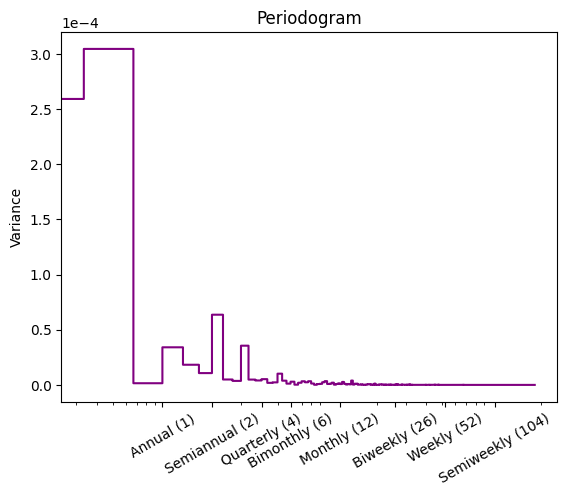

In [7]:
from utils.timeseries import plot_periodogram

plot_periodogram(df['close']);

In [8]:
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier

fourier = CalendarFourier(freq='YE', order=4)
dp = DeterministicProcess(
    index=df.index, 
    order=2, 
    constant=True, 
    seasonal=True,
    additional_terms=[fourier],
    drop=True
    )

X = dp.in_sample()
y = df['close']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

df = df.copy()

df['seasonality'] = model.predict(X)

df = df[['close', 'trend', 'seasonality']]
df

,close,trend,seasonality
time,,,
2021-05-24,0.89698,0.919866,0.927873
2021-05-25,0.89560,0.919965,0.928017
2021-05-26,0.89772,0.920064,0.928268
2021-05-27,0.89702,0.920163,0.928453
2021-05-28,0.89985,0.920261,0.928101
...,...,...,...
2024-11-18,0.88321,0.845891,0.845759
2024-11-19,0.88205,0.845656,0.844889
2024-11-20,0.88363,0.845420,0.843569


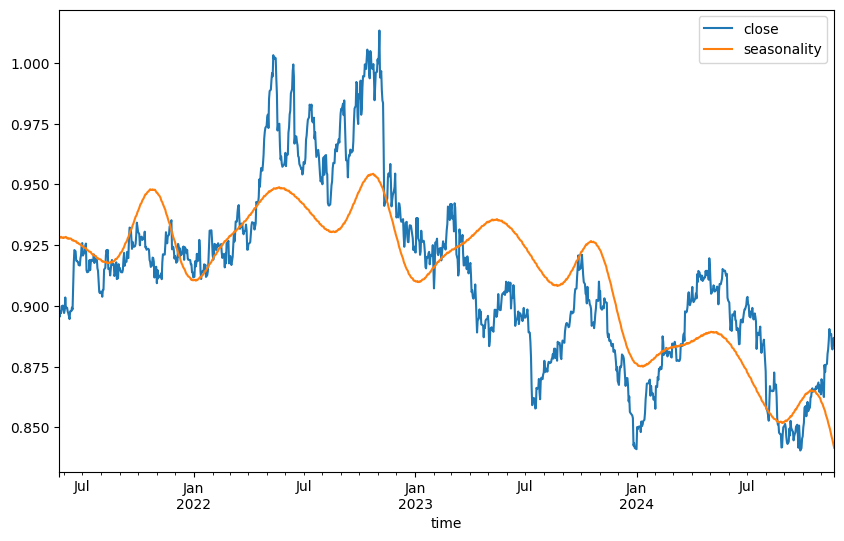

In [9]:
plt.figure(figsize=(10, 6))
ax = df['close'].plot()
df['seasonality'].plot(ax=ax)
plt.legend(['close', 'seasonality']);

# Cycles

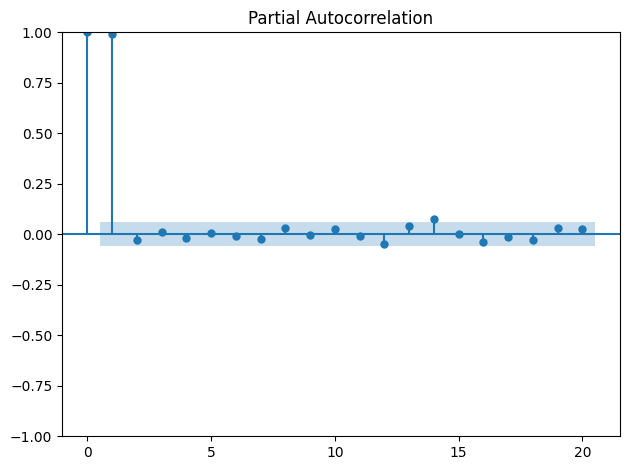

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['close'], lags=20, method='ywm')  

plt.tight_layout()
plt.show()


In [17]:
df = df.copy()
df['Lag_1'] = df['close'].shift(1)
df = df.dropna()
df.tail(10)

,close,trend,seasonality,Lag_1
time,,,,
2024-11-12,0.88211,0.847063,0.851867,0.88027
2024-11-13,0.88569,0.846829,0.850940,0.88211
2024-11-14,0.89044,0.846595,0.850106,0.88569
2024-11-15,0.88811,0.846361,0.849194,0.89044
2024-11-17,0.88842,0.846126,0.846912,0.88811
2024-11-18,0.88321,0.845891,0.845759,0.88842
2024-11-19,0.88205,0.845656,0.844889,0.88321
2024-11-20,0.88363,0.845420,0.843569,0.88205
2024-11-21,0.88681,0.845185,0.842492,0.88363


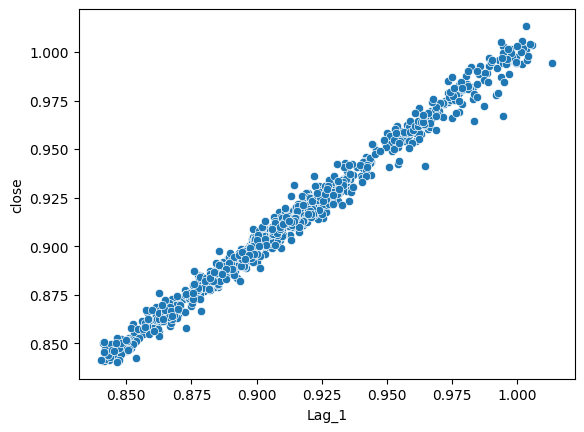

In [16]:
import seaborn as sns

sns.scatterplot(x=df['Lag_1'], y=df['close']);

In [65]:
from utils.timeseries import make_lags

X = make_lags(df['Lag_1'], lags=1)
X

,y_lag_1
time,
2021-05-26,0.00000
2021-05-27,0.89560
2021-05-28,0.89772
2021-05-30,0.89702
2021-05-31,0.89985
...,...
2024-11-18,0.88811
2024-11-19,0.88842
2024-11-20,0.88321


In [66]:
y = df['close']
y

time
2021-05-26    0.89772
2021-05-27    0.89702
2021-05-28    0.89985
2021-05-30    0.90009
2021-05-31    0.89836
               ...   
2024-11-18    0.88321
2024-11-19    0.88205
2024-11-20    0.88363
2024-11-21    0.88681
2024-11-22    0.88568
Freq: D, Name: close, Length: 1093, dtype: float64

In [68]:
model = LinearRegression()
model.fit(X, y)

df['cycles'] = model.predict(X)
df = df.drop('Lag_1', axis=1)
df

,close,trend,seasonality,cycles
time,,,,
2021-05-26,0.89772,0.920064,0.928268,0.339063
2021-05-27,0.89702,0.920163,0.928453,0.902560
2021-05-28,0.89985,0.920261,0.928101,0.903894
2021-05-30,0.90009,0.920359,0.927987,0.903454
2021-05-31,0.89836,0.920457,0.928247,0.905234
...,...,...,...,...
2024-11-18,0.88321,0.845891,0.845759,0.897848
2024-11-19,0.88205,0.845656,0.844889,0.898043
2024-11-20,0.88363,0.845420,0.843569,0.894765
